In [2]:
import numpy as np
# 加载训练集和测试集的数据

# 加载训练集和测试集数据，返回两个元组（输入和输出）
def load_data_training_and_test():
    npzfile = np.load("X_train.npz")
    X_train = npzfile['arr_0']
    npzfile = np.load("y_train.npz")
    y_train = npzfile['arr_0']
    
    npzfile = np.load("X_test.npz")
    X_test = npzfile['arr_0']
    npzfile = np.load("y_test.npz")
    y_test = npzfile['arr_0']
     
    return (X_train,y_train),(X_test,y_test)

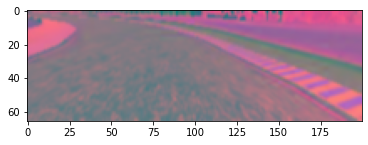

In [3]:
(X_train,y_train),(X_test,y_test) = load_data_training_and_test()
import cv2
import matplotlib.pyplot as plt
index = np.random.randint(0,len(X_train))
img = X_train[index]
plt.imshow(img)

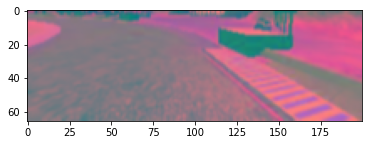

In [4]:
index = np.random.randint(0,len(X_test))
img = X_test[index]
plt.imshow(img)

# 构建自动驾驶cnn网络的模型

In [9]:
import tensorflow as tf 
# 创建一个顺序模型
model = tf.keras.Sequential()
# normalnation后的第一层
model.add(tf.keras.layers.Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='relu'))
# 第二层卷积
model.add(tf.keras.layers.Conv2D(36,(5,5),strides=(2,2),activation='relu'))
# 第三层卷积
model.add(tf.keras.layers.Conv2D(48,(5,5),strides=(2,2),activation='relu'))
# 第四层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
# 第五层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
# 全连接打平
model.add(tf.keras.layers.Flatten())

# 全连接的隐藏层
model.add(tf.keras.layers.Dense(1164,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))

model.add(tf.keras.layers.Dense(1)) # 方向盘的角度。

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1164)             

# 编译模型

In [10]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='mse')

In [11]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/30
18/18 [==============================] - 3s 191ms/step - loss: 0.1050 - val_loss: 0.1160
Epoch 2/30
18/18 [==============================] - 3s 177ms/step - loss: 0.1036 - val_loss: 0.1131
Epoch 3/30
18/18 [==============================] - 3s 175ms/step - loss: 0.0951 - val_loss: 0.0922
Epoch 4/30
18/18 [==============================] - 3s 176ms/step - loss: 0.0668 - val_loss: 0.0681
Epoch 5/30
18/18 [==============================] - 3s 184ms/step - loss: 0.0518 - val_loss: 0.0813
Epoch 6/30
18/18 [==============================] - 4s 196ms/step - loss: 0.0457 - val_loss: 0.0537
Epoch 7/30
18/18 [==============================] - 3s 188ms/step - loss: 0.0427 - val_loss: 0.0458
Epoch 8/30
18/18 [==============================] - 3s 191ms/step - loss: 0.0379 - val_loss: 0.0513
Epoch 9/30
18/18 [==============================] - 3s 189ms/step - loss: 0.0347 - val_loss: 0.0424
Epoch 10/30
18/18 [==============================] - 3s 190ms/step - loss: 0.0288 - val_loss: 0.0369

## 训练过程的可视化


Text(0, 0.5, 'loss')

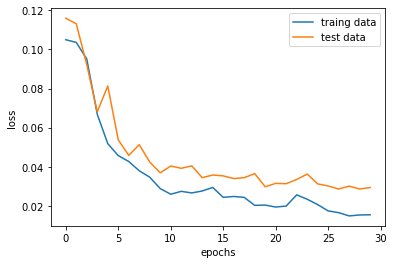

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['traing data','test data'])
plt.xlabel('epochs')
plt.ylabel('loss')

## 为了防止过拟合 dropout

In [5]:
import tensorflow as tf 
# 创建一个顺序模型
model = tf.keras.Sequential()
# normalnation后的第一层
model.add(tf.keras.layers.Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='relu'))
# 第二层卷积
model.add(tf.keras.layers.Conv2D(36,(5,5),strides=(2,2),activation='relu'))
# 第三层卷积
model.add(tf.keras.layers.Conv2D(48,(5,5),strides=(2,2),activation='relu'))
# 第四层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
# 第五层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))

# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))

# 全连接打平
model.add(tf.keras.layers.Flatten())

# 全连接的隐藏层
model.add(tf.keras.layers.Dense(1164,activation='relu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100,activation='relu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50,activation='relu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='relu'))

model.add(tf.keras.layers.Dense(1)) # 方向盘的角度。

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout (Dropout)            (None, 1, 18, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer,
              loss='mse')
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/30
18/18 [==============================] - 3s 185ms/step - loss: 0.1046 - val_loss: 0.1159
Epoch 2/30
18/18 [==============================] - 3s 175ms/step - loss: 0.1047 - val_loss: 0.1160
Epoch 3/30
18/18 [==============================] - 3s 175ms/step - loss: 0.1048 - val_loss: 0.1161
Epoch 4/30
18/18 [==============================] - 3s 175ms/step - loss: 0.1049 - val_loss: 0.1159
Epoch 5/30
18/18 [==============================] - 3s 181ms/step - loss: 0.1048 - val_loss: 0.1159
Epoch 6/30
18/18 [==============================] - 3s 182ms/step - loss: 0.1046 - val_loss: 0.1159
Epoch 7/30
18/18 [==============================] - 3s 184ms/step - loss: 0.1048 - val_loss: 0.1160
Epoch 8/30
18/18 [==============================] - 3s 188ms/step - loss: 0.1048 - val_loss: 0.1159
Epoch 9/30
18/18 [==============================] - 3s 188ms/step - loss: 0.1047 - val_loss: 0.1159
Epoch 10/30
18/18 [==============================] - 3s 194ms/step - loss: 0.1046 - val_loss: 0.1159

# 解决梯度消失

In [6]:
import tensorflow as tf 
# 创建一个顺序模型
model = tf.keras.Sequential()
# normalnation后的第一层
model.add(tf.keras.layers.Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='elu'))
# 第二层卷积
model.add(tf.keras.layers.Conv2D(36,(5,5),strides=(2,2),activation='elu'))
# 第三层卷积
model.add(tf.keras.layers.Conv2D(48,(5,5),strides=(2,2),activation='elu'))
# 第四层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='elu'))
# 第五层卷积
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='elu'))

# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))

# 全连接打平
model.add(tf.keras.layers.Flatten())

# 全连接的隐藏层
model.add(tf.keras.layers.Dense(1164,activation='elu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100,activation='elu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50,activation='elu'))
# 防止训练过拟合
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='elu'))

model.add(tf.keras.layers.Dense(1)) # 方向盘的角度。

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='mse')
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/30
18/18 [==============================] - 3s 187ms/step - loss: 0.1885 - val_loss: 0.1524
Epoch 2/30
18/18 [==============================] - 3s 188ms/step - loss: 0.1639 - val_loss: 0.1808
Epoch 3/30
18/18 [==============================] - 3s 190ms/step - loss: 0.1663 - val_loss: 238.4047
Epoch 4/30
18/18 [==============================] - 3s 185ms/step - loss: 21.2249 - val_loss: 0.1203
Epoch 5/30
18/18 [==============================] - 3s 189ms/step - loss: 0.2013 - val_loss: 0.1431
Epoch 6/30
18/18 [==============================] - 3s 191ms/step - loss: 0.1779 - val_loss: 0.1546
Epoch 7/30
18/18 [==============================] - 4s 211ms/step - loss: 0.1654 - val_loss: 0.1435
Epoch 8/30
18/18 [==============================] - 4s 216ms/step - loss: 0.1650 - val_loss: 0.1480
Epoch 9/30
18/18 [==============================] - 3s 179ms/step - loss: 0.1558 - val_loss: 0.1521
Epoch 10/30
18/18 [==============================] - 3s 178ms/step - loss: 0.1527 - val_loss: 0.1

Text(0, 0.5, 'loss')

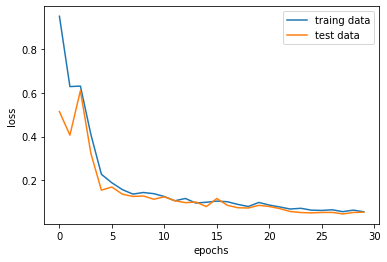

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['traing data','test data'])
plt.xlabel('epochs')
plt.ylabel('loss')

## 保存训练的模型

In [21]:
## 保存训练的模型
model.save('001.h5')

## 随机预测一张照片

array([[0.63863206]], dtype=float32)

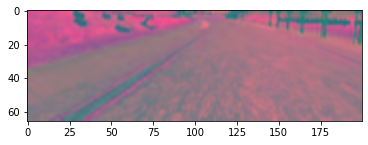

In [30]:
index = np.random.randint(len(X_test))

plt.imshow(X_test[index])
model.predict(np.array([X_test[index]])) 